In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import pylab
import statsmodels.api as sm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age'])

In [3]:
df

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [4]:
df.isnull().sum()

Age    177
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [7]:
df.isnull().sum()

Age    0
dtype: int64

# Histogram

<AxesSubplot:ylabel='Frequency'>

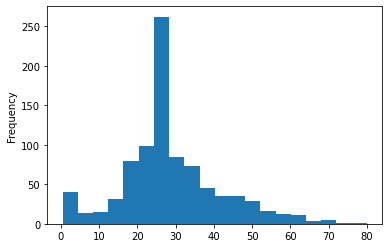

In [8]:
df['Age'].plot.hist(bins=20)

<AxesSubplot:xlabel='Age', ylabel='Density'>

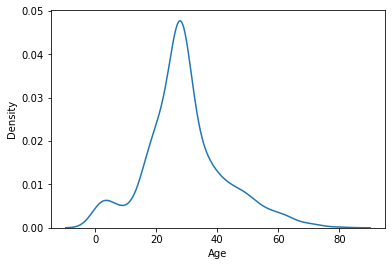

In [9]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

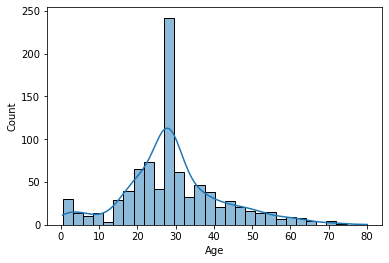

In [10]:
sns.histplot(df['Age'], kde = True)

# Boxplot

<AxesSubplot:xlabel='Age'>

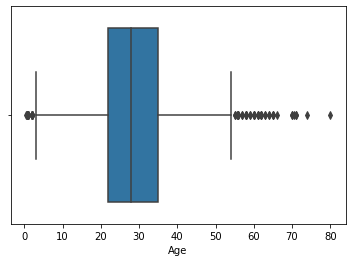

In [11]:
sns.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16f43a71850>,
 'caps': [<matplotlib.lines.Line2D at 0x16f43a71df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f43a71580>],
 'medians': [<matplotlib.lines.Line2D at 0x16f43a803d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f43a806a0>],
 'means': []}

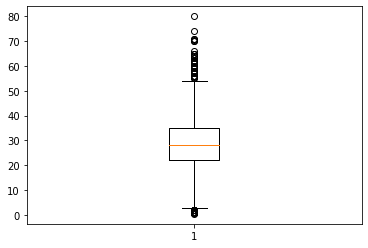

In [12]:
plt.boxplot(df['Age'])

# Q-Q plot

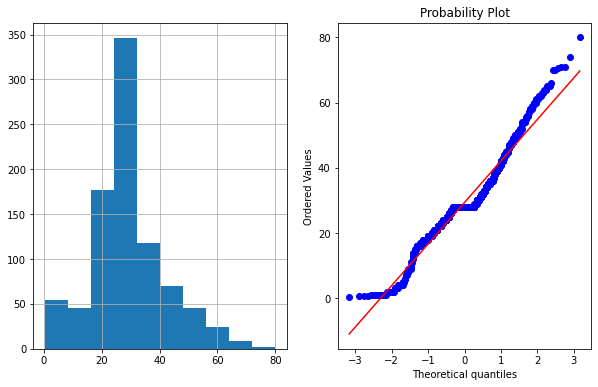

In [13]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
df['Age'].hist()
plt.subplot(1,2,2)
stats.probplot(df['Age'], plot = pylab)
plt.show()

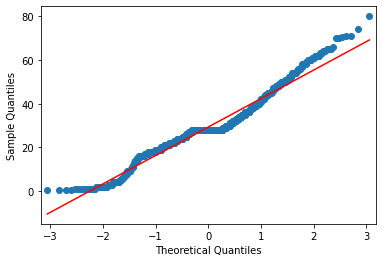

In [14]:
sm.qqplot(df['Age'], line='s')
pylab.show()

# Kolmogorov Smirnov test

In [16]:
from scipy.stats import kstest, norm

ks_statistic, p_value = kstest(df['Age'], 'norm')

print(ks_statistic, p_value)

0.971714075032343 0.0


* if p > 0.05 then feature is normally distributed
* if p < 0.05 then feature is not normally distributed

# Lilliefors test

In [18]:
from statsmodels.stats.diagnostic import lilliefors
l_statistic, p_value = lilliefors(df['Age'])
print(l_statistic, p_value)

0.1465831994748112 0.0009999999999998899


* if p > 0.05 then feature is normally distributed
* if p < 0.05 then feature is not normally distributed

# Shapiro Wilk Test

In [22]:
from scipy.stats import shapiro
shapiro(df['Age'])

ShapiroResult(statistic=0.9541045427322388, pvalue=4.650938269969563e-16)

* if p > 0.05 then feature is normally distributed
* if p < 0.05 then feature is not normally distributed